<h1>Stock and Revenue data using yfinance library and webscraping concepts (BeautifulSoup library)</h1>
<p><b>Author: P. Abhishek</b></p>

In [3]:
#installing necessary packages
!pip install yfinance beautifulsoup4 pandas requests

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/4b/fb/2b6290436f0188d1f1d51c8076e32c9c50f24afa1c698430394eead3a890/yfinance-0.2.63-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 655.4

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/4b/fb/2b6290436f0188d1f1d51c8076e32c9c50f24afa1c698430394eead3a890/yfinance-0.2.63-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
  Using cached frozendict-2.4.6-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Gettin

In [1]:
#importing necessary packages
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

<h2>Question 1 - Extracting Tesla Stock Data Using yfinance</h2>

In [2]:
# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Display the first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h2>Question 2 - Extracting Tesla Revenue Data Using Webscraping</h2>

In [3]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract the correct table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")

# Loop through the second table
if len(tables) > 1:
    for row in tables[1].tbody.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

print(tesla_revenue.tail())


          Date Revenue
58  2010-09-30      31
59  2010-06-30      28
60  2010-03-31      21
61  2009-09-30      46
62  2009-06-30      27


<h2>Question 3 - Extracting GameStop Stock Data Using yfinance</h2>

In [4]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h2>Question 4 - Extracting GameStop Revenue Data Using Webscraping</h2>

In [5]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract the correct table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tables = soup.find_all("table")

# Loop through the second table
if len(tables) > 1:
    for row in tables[1].tbody.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue:
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

print(gme_revenue.tail())


          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


In [6]:
#common function for both dashboards (questions 5&6)
import matplotlib.pyplot as plt

def make_dashboard(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    stock_data = stock_data[stock_data['Date'] >= '2015-01-01']
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    revenue_data = revenue_data[revenue_data['Date'] >= '2015-01-01']

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], 'b-', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend(loc="upper left")

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), 'r-', label='Revenue')
    ax2.set_ylabel("Revenue (in USD)", color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc="upper right")

    plt.title(title)
    fig.tight_layout()
    plt.grid(True)
    plt.show()

<h2>Question 5 - Tesla Stock and Revenue Dashboard</h2>

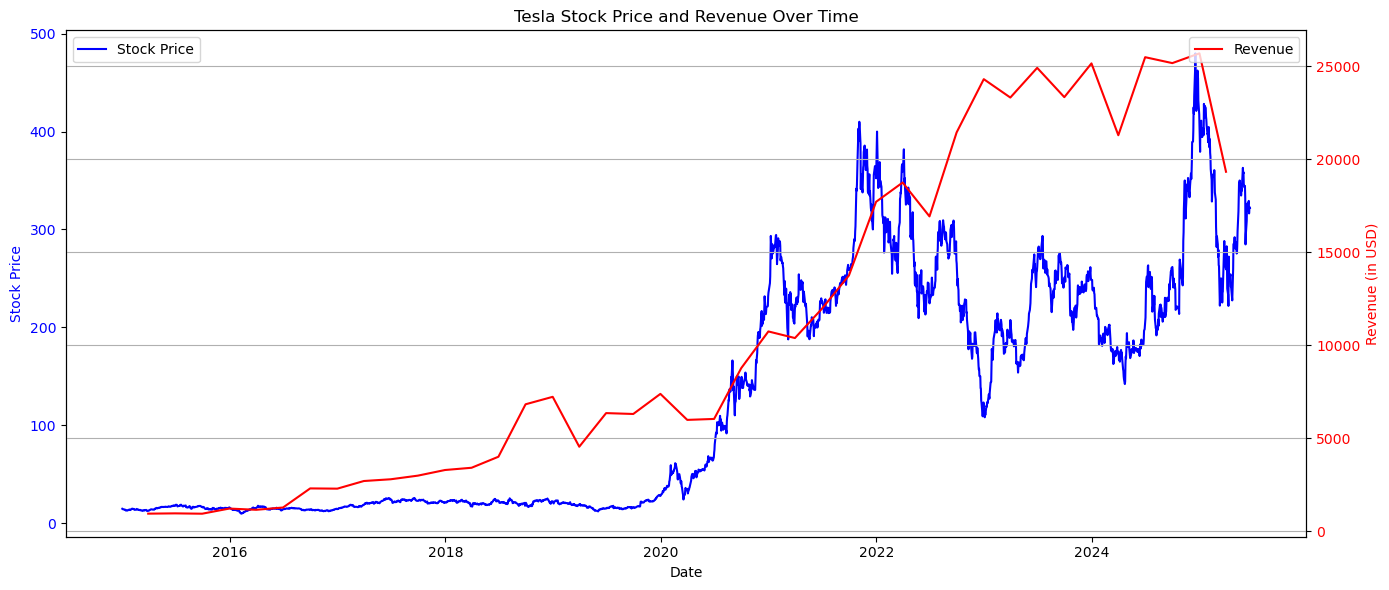

In [7]:
make_dashboard(tesla_data, tesla_revenue, "Tesla Stock Price and Revenue Over Time")

<h2>Question 6 - GameStop Stock and Revenue Dashboard</h2>

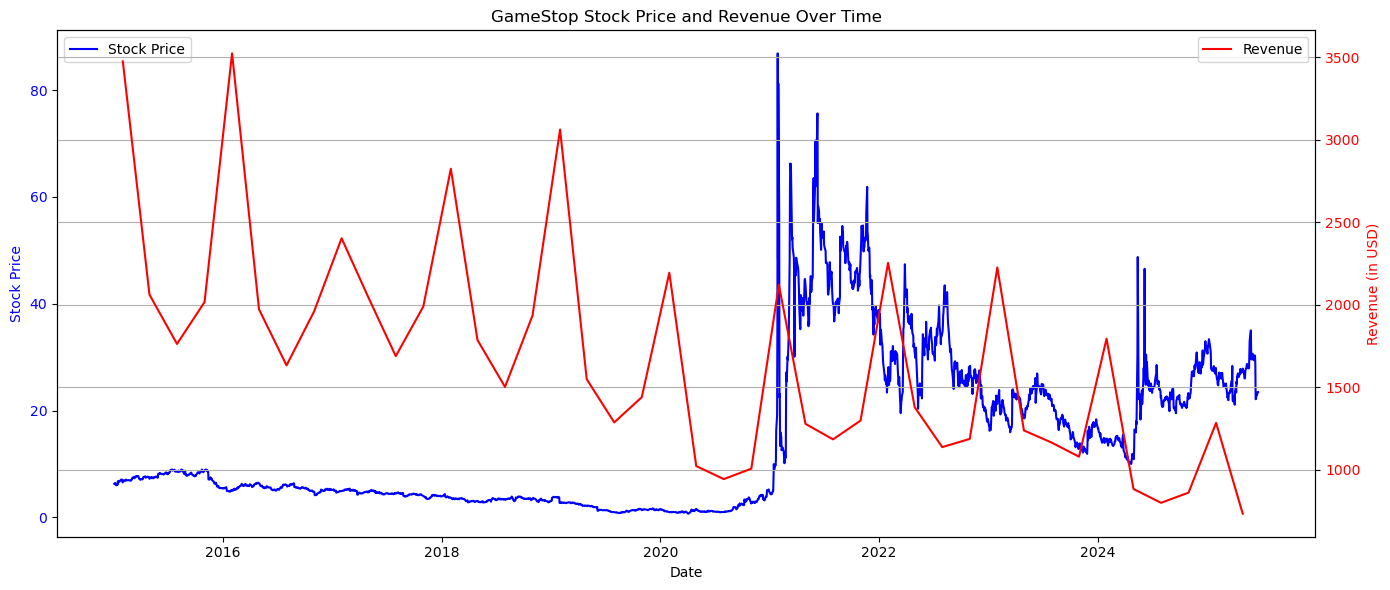

In [8]:
make_dashboard(gme_data, gme_revenue, "GameStop Stock Price and Revenue Over Time")